## Add Path + Imports + Load Data

In [44]:
import os
import sys
import pandas as pd
import numpy as np

# Add parent folder to path so 'utils' is accessible
sys.path.append(os.path.abspath(".."))

# Load dataset
df = pd.read_csv('../data/fake_job_postings.csv')
df.head()


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Drop Nulls + Combine Text Fields

In [45]:
# Select important columns
df = df[['title', 'description', 'fraudulent']]

# Drop rows with missing values
df.dropna(inplace=True)

# Combine title and description into a single field
df['text'] = df['title'] + " " + df['description']

# Check data
df[['text', 'fraudulent']].head()


,text,fraudulent
0,"Marketing Intern Food52, a fast-growing, James...",0
1,Customer Service - Cloud Video Production Orga...,0
2,Commissioning Machinery Assistant (CMA) Our cl...,0
3,Account Executive - Washington DC THE COMPANY:...,0
4,Bill Review Manager JOB TITLE: Itemization Rev...,0


## Import and Apply Text Cleaning Function

In [46]:
from utils.text_cleaning import clean_text

# Apply clean_text function
df['clean_text'] = df['text'].apply(clean_text)

# Show result
df[['text', 'clean_text']].head()


,text,clean_text
0,"Marketing Intern Food52, a fast-growing, James...",marketing intern food fastgrowing james beard ...
1,Customer Service - Cloud Video Production Orga...,customer service cloud video production organi...
2,Commissioning Machinery Assistant (CMA) Our cl...,commissioning machinery assistant cma client l...
3,Account Executive - Washington DC THE COMPANY:...,account executive washington dc company esri e...
4,Bill Review Manager JOB TITLE: Itemization Rev...,bill review manager job title itemization revi...


## Vectorize the Cleaned Text using TF-IDF

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),            # includes unigrams + bigrams
    stop_words='english',          # removes common words
    min_df=2                       # ignore very rare terms
)

X = tfidf.fit_transform(df['clean_text'])
y = df['fraudulent']


## Split the Data

In [48]:
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Train Logistic Regression Model

In [49]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',      # gives more weight to minority class (fraud)
    random_state=42
)
model.fit(X_train, y_train)



LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

 ## Evaluate the Model

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3403
           1       0.51      0.84      0.63       173

    accuracy                           0.95      3576
   macro avg       0.75      0.90      0.80      3576
weighted avg       0.97      0.95      0.96      3576



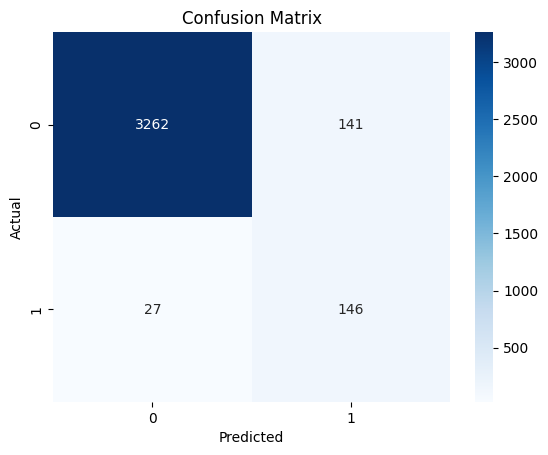

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Save the Model & Vectorizer

In [51]:
import joblib

joblib.dump(model, '../models/fake_job_model.pkl')
joblib.dump(tfidf, '../models/tfidf_vectorizer.pkl')


['../models/tfidf_vectorizer.pkl']